# Bearing Failure Prediction - 1D CNN


## Dataset

In [2]:
import tensorflow as tf 
import numpy as np 
from src.loader.load_dataset_1d_cnn import load_dataset
from sklearn.utils import class_weight
from src.models.cnn1d import create_cnn1d
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
X_train, X_test, y_train, y_test = load_dataset(r"root dir")
print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Creating Window...

This bearing is healthy
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is healthy
This bearing is healthy
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is healthy
This bearing is healthy
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is faulty
Creating Window...

This bearing is faulty
This bearing is healthy
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is faulty
This bearing is faulty
Train shape:  (498903, 2048, 1)
Test shape:  (139571, 2048, 1)


In [4]:
print("healthy: ", np.sum(y_train == 0))
print("faulty: ", np.sum(y_train == 1))
print("healthy: ", np.sum(y_test == 0))
print("faulty: ", np.sum(y_test == 1))

healthy:  99750
faulty:  399153
healthy:  19929
faulty:  119642


In [5]:
# Balance clases
class_weights = class_weight.compute_class_weight(
    class_weight = "balanced",
    classes = np.unique(y_train),
    y = y_train
)
class_weights = dict(enumerate(class_weights))
print("Weigths: ", class_weights)

Weigths:  {0: np.float64(2.500766917293233), 1: np.float64(0.6249520860421943)}


## Model training

In [6]:
# Build model
model1 = create_cnn1d(input_shape = X_train.shape[1:])
model1.summary()

c:\Users\maria\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2048, 32)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2048, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1024, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1024, 64)       │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1024, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 512, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 512, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 256, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,481 (173.75 KB)

 Trainable params: 44,033 (172.00 KB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
# Hyperparameters
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        patience = 5, 
        restore_best_weights = True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        "best_model.h5",
        save_best_only = True
    )
]

In [8]:
# Training
history1 = model1.fit(
    X_train,
    y_train,
    epochs = 20,
    batch_size = 256,
    validation_data = (X_test, y_test),
    class_weight = class_weights,
    callbacks = callbacks
)

Epoch 1/20
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.9238 - loss: 0.1577 - precision: 0.9876 - recall: 0.9159

1949/1949 ━━━━━━━━━━━━━━━━━━━━ 1650s 844ms/step - accuracy: 0.9601 - loss: 0.0896 - precision: 0.9939 - recall: 0.9560 - val_accuracy: 0.8348 - val_loss: 0.8129 - val_precision: 0.9905 - val_recall: 0.8151
Epoch 2/20
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 1731s 888ms/step - accuracy: 0.9873 - loss: 0.0333 - precision: 0.9977 - recall: 0.9863 - val_accuracy: 0.7642 - val_loss: 1.8156 - val_precision: 0.9991 - val_recall: 0.7256
Epoch 3/20
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 1735s 890ms/step - accuracy: 0.9909 - loss: 0.0250 - precision: 0.9983 - recall: 0.9904 - val_accuracy: 0.7681 - val_loss: 2.0010 - val_precision: 0.9986 - val_recall: 0.7305
Epoch 4/20
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 1716s 881ms/step - accuracy: 0.9927 - loss: 0.0206 - precision: 0.9987 - recall: 0.9922 - val_accuracy: 0.7320 - val_loss: 1.9997 - val_precision: 0.9995 - val_recall: 0.6878
Epoch 5/20
1949/1949 ━━━━━━━━━━━━━━━━━━━━ 1720s 883ms/step - accuracy: 0.9936 - loss: 0.0178 - precision: 0.9989 - recall: 0.9932 - val_accurac

## Evaluation

In [9]:
# Evaluate
acc, loss, precision, recall = model1.evaluate(X_test, y_test)
y_pred = (model1.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

4362/4362 ━━━━━━━━━━━━━━━━━━━━ 84s 19ms/step - accuracy: 0.8348 - loss: 0.8129 - precision: 0.9905 - recall: 0.8151
4362/4362 ━━━━━━━━━━━━━━━━━━━━ 71s 16ms/step
              precision    recall  f1-score   support

           0       0.46      0.95      0.62     19929
           1       0.99      0.82      0.89    119642

    accuracy                           0.83    139571
   macro avg       0.73      0.88      0.76    139571
weighted avg       0.91      0.83      0.86    139571



In [11]:
# Confuision matrix
matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix: ", matrix)

confusion matrix:  [[18990   939]
 [22122 97520]]


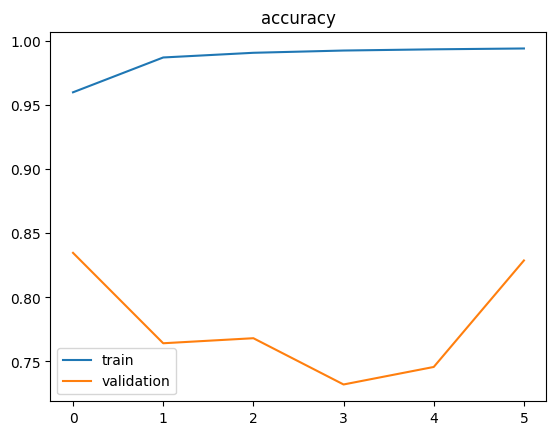

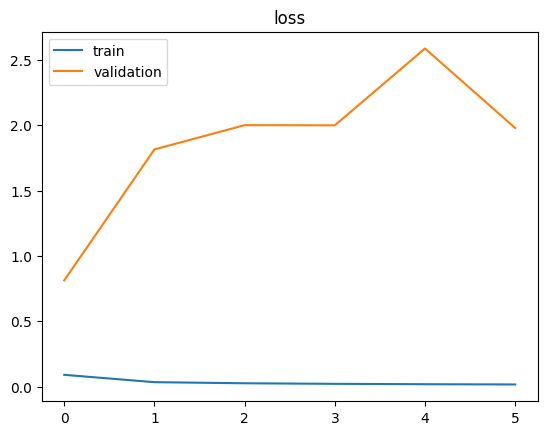

In [12]:
# Training curve
plt.figure()
plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_accuracy"])
plt.title("accuracy")
plt.legend(["train", "validation"])
plt.show()

plt.figure()
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.title("loss")
plt.legend(["train", "validation"])
plt.show()